<a href="https://colab.research.google.com/github/syfauziah/Predicting-Heart-Disease-Using-Machine-Learning/blob/main/Predicting_Heart_Disease_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Heart Disease Using Machine Learning**




Heart disease prediction atau Program prediksi penyakit jantung adalah sebuah program berbasis data dan machine learning yang akan digarap oleh tim kami.

Tujuannya adalah untuk membantu mendeteksi potensi risiko penyakit jantung pada pasien berdasarkan data kesehatan dan klinis.




## **i.Pendahuluan**

Machine Learning adalah sebuah bidang yang berkembang dengan cepat memanfaatkan berbagai pengklasifikasi seperti supervised, unsupervised, dan ensemble learning untuk mempelajari pola dari data, membuat prediksi yang akurat, dan membantu dalam pengambilan keputusan. Dengan kemampuan ini machine learning dapat diterapkan pada berbagai masalah, termasuk memprediksi kemungkinan penyakit jantung.

Penyakit kardiovaskular sangat umum terjadi belakangan ini, penyakit ini menggambarkan berbagai kondisi yang dapat memengaruhi jantung seseorang. Organisasi kesehatan dunia (WHO) memperkirakan bahwa 17,9 juta kematian diseluruh dunia disebabkan oleh CVD.

Proyek ini berfokus pada penggunaan tiga teknik data mining: Logistic Regression, K-Nearest Neighbors (KNN), dan Random Forest Classifier. Metode-metode ini menganalisis berbagai atribut medis seperti jenis kelamin, usia, jenis nyeri dada, kadar gula puasa, dll., untuk menentukan probabilitas seorang pasien terkena penyakit kardiovaskular.

## **ii.Referensi**










Dalam proyek ini, terdapat dua referensi yang memiliki peran berbeda.

Referensi utama memberikan penjelasan yang lebih umum mengenai alur, tahap, atribut, dan model yang akan digunakan dalam proyek klasifikasi penyakit jantung. Referensi ini memfokuskan pada gambaran besar proyek dan hubungan antara atribut-atribut yang digunakan dalam analisis.

Di sisi lain, referensi tambahan lebih mendetail dan fokus pada bagaimana model akan dilatih, dievaluasi, dan ditingkatkan. Referensi ini mencakup aspek seperti pembagian data, penggunaan evaluation metrics, serta perbandingan berbagai metode Machine Learning yang digunakan dalam proyek.

Dengan memadukan informasi dari kedua referensi ini, proyek klasifikasi penyakit jantung dapat dikembangkan dengan pemahaman yang lebih lengkap, mulai dari konsep dasar hingga detail teknis yang diperlukan untuk melatih, menguji, dan meningkatkan model.



> * **[Referensi Utama](https://iopscience.iop.org/article/10.1088/1757-899X/1022/1/012072)**
> * **[Referensi Tambahan](https://jurnal.untan.ac.id/index.php/jepin/article/view/480532)**







## **Workflow / Alur Kerja:**

![picture0](https://drive.google.com/uc?export=view&id=1oNuFRPNFryvTqnMyMyXM0d5RWTsOFRJ6)

### 0. [Problem Definition](#scrollTo=1X_JoHE429ss)
### 1. [Preparing the tools](#scrollTo=wJlHFNiQ29vV)
### 2. [Load Data](#scrollTo=Qd8xf5bJ29x6)
### 3. [Data Exploration](#scrollTo=qVoo_WuHq875)
### 4. [Modeling](#scrollTo=-i_k5eSBzWRo)
### 5. [Evaluation](#scrollTo=1tBOE7Vc2f2_)
### 6. [Experimentation](#scrollTo=YzlJu5tx4B8s)





## 0 - Problem Definition / Definisi Masalah


---


**Masalah** : Menggunakan machine learning untuk memprediksi apakah seseorang memiliki penyakit jantung atau tidak berdasarkan berbagai data medis yang tersedia.

**Tujuan** : Membangun model machine learning yang dapat memprediksi apakah seseorang memiliki penyakit jantung berdasarkan berbagai faktor medis dan atribut yang ada.

**Jenis Masalah** : Klasifikasi biner, di mana individu dapat diklasifikasikan sebagai "Heart Disease" (memiliki penyakit jantung) atau "Not Heart Disease" (tidak memiliki penyakit jantung)

## 1 - Preparing the tools

---

![picture1](https://drive.google.com/uc?export=view&id=1TY7uWQ7RmD3_ekSLvWsfZ2aL2MAcWI51)



* [**Pandas**](https://pandas.pydata.org/): Library open source pada Python yang
sering digunakan untuk memproses data yang
meliputi pembersihan data, manipulasi data,
hingga melakukan analisis data.

* [**Numpy**](https://numpy.org/) : Library pada Python yang berfungsi
melakukan proses komputasi numerik.

* [**Matplotlib**](https://matplotlib.org/) / [**seaborn**](https://seaborn.pydata.org/) : Library pada Python yang digunakan
untuk menciptakan visualisasi data dengan grafis
yang menarik dan informatif.

* [**Scikit-learn (sklearn)**](https://scikit-learn.org/stable/) : Sebuah library machine
learning open-source yang popular di Python
yang membantu melakukan processing data
ataupun melakukan training data untuk
kebutuhan machine learning atau data science.



In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  StratifiedKFold, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from tabulate import tabulate


## 2 - Load Data


---

![picture2](https://drive.google.com/uc?export=view&id=1kZh1ydNYYfXB3HlsaJppVgqZdSdQ7mDK)

Berikut adalah link dari dataset yang akan digunakan:

https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

Dataset yang akan digunakan dalam proyek ini merupakan dataset medis yang awalnya berasal dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/). Dataset ini mencakup berbagai atribut medis, termasuk jenis kelamin, usia, gejala nyeri dada, kadar gula darah saat puasa, tekanan darah, dan atribut lainnya. Dataset ini kemudian diunggah ke platform [Kaggle](https://www.kaggle.com/) untuk akses yang lebih luas dan analisis lebih lanjut.

In [ ]:
df = pd.read_csv("/content/heart_cleveland_upload.csv")
df.shape

(297, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')



### Heart Disease Data Dictionary:
1. age: usia dalam tahun
2. sex: jenis kelamin (1 = laki-laki; 0 = perempuan)
3. cp: chest pain type / jenis nyeri dada
  * Value 0: typical angina
    *  angina tipikal: (Angina pectoris tipikal meliputi keluhan rasa seperti berat, ditusuk, rasa terbakar, panas atau terktekan di daerah retrosternal menjalar hingga ke lengan kiri, leher, rahang, interskapula atau daerah epigastrium.)
  * Value 1: atypical angina
    * angina atipikal: (Nyeri dada tidak stabil terkadang bersifat atipikal atau sering disebut Angina Ekuivalen yaitu rasa tidak nyaman di dada yan sulit dijelaskan, atau sesak napas atau keluhan lemah yang mendadak yang dapat disertai gejala diaphoresis (keringat dingin) )
  * Value 2: non-anginal pain
    * nyeri non-angina: (Nyeri dada nonangina adalah gejala umum dari berbagai kondisi, mulai dari masalah pencernaan hingga kondisi kejiwaan. Nyeri ini mungkin terasa seperti tekanan atau rasa sakit yang menekan di belakang tulang dada.)
  * Value 3: asymptomatic
    * tanpa gejala
4. trestbps(resting blood preasure): tekanan darah istirahat (dalam mmHg saat masuk ke rumah sakit)
5. chol (cholesterol): kolesterol serum dalam mg/dl
6. fbs (fasting blood sugar):(gula darah puasa > 120 mg/dl) (1 = benar; 0 = salah)
7. restecg(Hasil elektrokardiografi): resting electrocardiographic results
  * Value 0: normal
  * Value 1: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)
  * Value 2: menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti berdasarkan kriteria Estes
8. thalach: denyut jantung maksimum yang dicapai
9. exang (exercise induced angina): angina yang diinduksi oleh olahraga (1 = ya; 0 = tidak)
10. oldpeak = depresi ST yang disebabkan oleh olahrga relatif terhadap istirahat
11. slope: Kemiringian segmen ST latihan puncak
  * Value 0: upsloping/miring
  * Value 1: flat/datar
  * Value 2: downsloping/miring
12. ca(calculate artery): jumlah pembuluh darah utama(0-3) yang diwarnai dengan flourosopi
13. thal: 0 = normal; 1 = fixed defect/ cacat tetap; 2 = reversable defect
and the label/cacat yang dapat dibalikan dan label

14. condition: 0 = no disease, 1 = disease


## 3 - Data Exploration (Exploratory data analysis or EDA)


---


Menganalisis dataset untuk
memahami karakteristik data dengan
menvisualisasikan data,
mengidentifikasi pola dan
menemukan informasi penting dalam
data yang dapat membantu untuk
memahami lebih dalam tentang
dataset tersebut.

### 3.1 - Initial Dataset Exploration for Heart Disease Analysis

#### 3.1.1 - The First 10 rows of the DataFrame
 > `df.head(10)` berfungsi untuk menampilkan sepuluh baris pertama dari dataset untuk mendapatkan gambaran awal tentang struktur dan nilai-nilai dalam dataset tersebut. Ini membantu dalam eksplorasi awal dan pemahaman tentang konten dari DataFrame.





In [ ]:
df.head(10)

NameError: name 'df' is not defined

#### 3.1.2 The Last 10 rows of the DataFrame

 > `df.tail(10)` berfungsi untuk menampilkan sepuluh baris akhir dari dataset untuk mendapatkan gambaran  tentang data paling akhir dari Data Frame.


In [ ]:
df.tail(10)

#### 3.1.3 Random Sampling of 10 Rows from the Dataset
> `df.sample(10)` digunakan untuk memilih secara acak memilih 10 baris dari DataFrame.

In [ ]:
df.sample(10)

#### 3.1.4 Overview of the DataFrame
`df.info()` adalah perintah dalam pandas untuk memberikan informasi ringkas tentang DataFrame.


In [ ]:
df.info()



> Penjelasan Output:
 * RangeIndex: Menunjukkan rentang indeks dari DataFrame, biasanya dimulai dari 0 dan berakhir pada jumlah total baris dikurangi satu.
 * Data Columns (Total Columns): Menampilkan daftar semua kolom dalam DataFrame beserta jumlah total kolom.
 * Non-Null Count: Untuk setiap kolom, menunjukkan jumlah non-null (nilai yang tidak kosong). Hal ini membantu mengidentifikasi apakah ada nilai yang hilang.
 * Dtype: Tipe data dari setiap kolom. Ini memberikan informasi tentang apakah kolom tersebut berisi data numerik, string, tanggal, atau jenis data lainnya.
 * Memory Usage: Memberikan perkiraan penggunaan memori oleh DataFrame.

#### 3.1.5 Identifying and Counting Missing Values in Each Column of a DataFrame
`df.isna().sum()` digunakan untuk menghitung jumlah nilai yang hilang (NaN/null) dalam setiap kolom dari DataFrame `df`


In [ ]:
df.isna().sum()



> Dari output diatas dapat disimpulkan  bahwa tidak ada nilai yang hilang di dalam kolom mana pun. Setiap kolom menunjukkan jumlah nol, menandakan bahwa dataset tersebut lengkap tanpa adanya nilai null atau NaN, ini menunjukan bahwa dataset sudah terisi penuh, memungkinkan analisis yang komprehensif tanpa perlu imputasi data atau penanganan nilai yang hilang.



#### 3.1.6 Descriptive Statistical Summary of the DataFrame

`df.describe()` adalah sebuah fungsi dalam pandas yang memberikan ringkasan statistik deskriptif dari DataFrame

In [ ]:
df.describe()





> * Count: Jumlah entri/non-null data setiap data kolom.
* Mean: Rata-rata aritmatika dari nilai dalam kolom.
* Std(Standard Deviaton): Deviasi standar dari nilai dalam kolom.
* Min: Nilai terkecil dalam kolom.
* 25th Percentile(Q1): Nilai dimana 25% data terendah berada (kuartil pertama).
* 50th Percentile(Median/Q2): Nilai tengah dari data (median) atau kuartil kedua.
* 75th Percentile(Q3): Nialia dimana 75 data terendah berada(kuartil ketiga).
* Max: Nilai terbesar dalam kolom.






#### 3.1.7 Outliers


### 3.2 - Prevalence of Heart Disease Cases in the Dataset

In [ ]:
df.condition.value_counts()

In [ ]:
df.condition.value_counts(normalize=True)

In [ ]:
df.condition.value_counts().plot(kind="bar", color=["salmon","lightblue" ])
plt.xticks([0, 1], ["Non-Heart Disease", "Heart Disease"], rotation=0)

plt.title("Distribution of Non-Heart Disease vs. Heart Disease Cases")
plt.xlabel("Condition")
plt.ylabel("Count")

plt.show()

### 3.3 - Heart Disease Frequency according to Gender

In [ ]:
df.sex.value_counts()

In [ ]:
crosstab = pd.crosstab(df.condition, df.sex)

crosstab.index = ["Non-Heart Disease", "Heart Disease"]
crosstab.columns = ["Female", "Male"]
crosstab

In [ ]:
crosstab.plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.xticks(rotation=0);

### 3.4 - Distribution of Age in the Dataset

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(data=df['age'], alpha=0.6, color= "lightblue")

mean_age = df["age"].mean()
plt.axvline(mean_age, color="red")
plt.text(mean_age - 12, 42, f"Mean age: {round(mean_age, 1)}",
         color="indianred", weight="bold", size="large",
         bbox=dict(boxstyle="round", color="rosybrown"))

plt.title("Distribution of Age in Dataset")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()


#### 3.4.1 - Correlation Between Age and Max Heart Rate in Heart Disease Analysis


In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.condition==1],
            df.thalach[df.condition==1],
            c="salmon")

plt.scatter(df.age[df.condition==0],
            df.thalach[df.condition==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "Non-Heart Disease"]);

#### 3.4.2 - Correlation Between Age and Serum Cholesterol in Heart Disease Analysis

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.condition==1],
            df.chol[df.condition==1],
            c="salmon")

plt.scatter(df.age[df.condition==0],
            df.chol[df.condition==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Serum Cholesterol (mg/dL)")
plt.xlabel("Age")
plt.ylabel("Serum Cholesterol in mg/dL")
plt.legend(["Heart Disease", "Non-Heart Disease"]);

#### 3.4.3 Correlation Between Age vand Resting Blood Pressure in Heart Disease Analysis

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(df.age[df.condition==1],
            df.trestbps[df.condition==1],
            c="salmon")

plt.scatter(df.age[df.condition==0],
            df.trestbps[df.condition==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Heart Disease", "Non-Heart Disease"]);

### 3.5 - Heart Disease Frequency per Chest Pain Type






In [ ]:
crosstab2 = pd.crosstab(df.cp, df.condition)
crosstab2.index = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
crosstab2.columns = ["Non-Heart Disease", "Heart Disease"]
crosstab2

In [ ]:
sns.set_style("whitegrid")

crosstab2.plot(kind="bar",
               figsize=(10,6),
               color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["Non-Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

### 3.6 - Visualizing Data Relationships: Creating a Correlation Matrix


In [ ]:
corr_matrix = df.corr()
corr_matrix

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

NameError: name 'plt' is not defined

## 4 - Modeling

---

Modelling dalam konteks machine learning merupakan tahap penting dalam pengembangan sistem prediktif.

Pada tahap ini, algoritma yang sesuai dipilih untuk memodelkan hubungan antara **fitur** dan **target** dalam dataset.

Dataset dibagi menjadi dua bagian: **training** dan **test**.

Model dilatih menggunakan dataset training untuk memahami pola dan variabilitas dalam data. Setelah pelatihan, model diuji pada dataset test untuk mengevaluasi kemampuannya dalam membuat prediksi akurat pada data yang belum pernah dilihat sebelumnya.

Proses ini melibatkan penyetelan parameter dan evaluasi kinerja model untuk memastikan generalisasi yang baik pada situasi dunia nyata. Model yang optimal kemudian disimpan untuk penggunaan masa depan. Tahap modelling memainkan peran kunci dalam membentuk prediksi yang andal dan memahami pola yang tersembunyi dalam data.



#### 4.1 - Full Dataset

![picture3](https://drive.google.com/uc?export=view&id=11Phs6AL7MR-S2adfoyRfxVPRDV06iyrD)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


### 4.2 - Features and Target Split

Dalam tahap pemisahan **fitur** dan **target** ini, dataset awal dibagi menjadi dua kelompok utama : fitur(features) dan target.

* **Features(Fitur)** => Variabel-variabel input yang digunakan oleh model untuk membuat prediksi

* **Target** => variabel output yang ingin diprediksi

Pemisahan ini bertujuan untuk memberikan panduan jelas kepada model tentang apa yang harus diprediksi.

Misalnya pada project ini yaitu prediksi penyakit jantung, fitur-fitur seperti age/usia, sex/jenis kelamin, chol/kolesterol, dan lain-lain mungkin menjadi variabel input, sedangkan variabel targetnya adalah apakah seseorang memiliki penyakit jantung atau tidak.

Proses ini memungkinkan model untuk memahami relasi antara fitur fitur tersebut dan target yang ingin diprediksi, sehingga dapat menghasilkan prediksi yang akurat saat diberikan data baru.


![picture4](https://drive.google.com/uc?export=view&id=1K-AXWwfoluiNWURUVO7L4rWeaoMURFIe)




In [ ]:
X = df.drop("condition", axis = 1)
y = df.condition.values

> * **X = Features (variabel-variabel input yang digunakan oleh model untuk membuat prediksi)**
* **y = Target (variabel output yang ingin diprediksi)**


#### 4.2.1 - Features

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


#### 4.2.2 - Target

In [ ]:
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

### 4.3 - Training and Test Split

Tahap training dan test split dalam machine learning adalah proses pembagian dataset menjadi dua subset utama : **Training set** dan **Test set**.

Pembagian ini penting untuk mengukur seberapa baik model dapat menggeneralisasi pola yang telah dipelajari dari data pelatihan ke data yang belum pernah dilihat sebelumnya.

* **Training set** => digunakan untuk melatih model, yaitu untuk memahami pola dan hubungan antara **features** dan **target**.
* **Test set** => digunakan untuk menguji kinerja model pada data yang tidak pernah dilihat sebelumnya, memberikan gambaran tentang sejauh mana model dapat memberikan prediksi yang akurat

Pemisahan dataset menjadi training dan test set membantu mencegah overfitting, dimana model terlalu spesifik untuk data pelatihan dan kehilangan kemampuan untuk menggeneralisasi pada data baru.

![picture5](https://drive.google.com/uc?export=view&id=14yQ0S5g1QhzMSF7k2gSi9Llqz5nWUOlk)

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

> * `np.random.seed(42)` digunakan untuk menetapkan seed untuk generator angka acak NumPy, menetapkan seed ini memastikan bahwa pembagian dataset menjadi training dan test set akan konsisten setiap kali kode dijalankan.
* `train_test_split(x, y test_size=0.3)` adalah fungsi dari library Scikit-learn(skelarn) digunakan untuk membagi dataset menjadi subset training dan test. Parameter pertama (`x`) adalah dataset features(fitur), parameter kedua (`y`) adalah dataset target dan `test_size = 0.3` menunjukan bahwa 30% dari data akan digunakan untuk test set, sementara 70% sisanya akan digunakan sebagai training set. Hasil dari pembagian fungsi ini akan menghasilkan empat variable yaitu **'x_train'** (fitur training), **'x_test'** (fitur test), **'y_train'** (target training), **'y_test'** (target test).

In [ ]:
print(f"Total Data X_train: {len(X_train)}")
print(f"Total Data y_train: {len(y_train)}")
print(f"Total Data X_test: {len(X_test)}")
print(f"Total Data y_test: {len(y_test)}")

Total Data X_train: 207
Total Data y_train: 207
Total Data X_test: 90
Total Data y_test: 90


In [ ]:
X_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,49,0,3,130,269,0,0,163,0,0.0,0,0,0
37,56,0,1,140,294,0,2,153,0,1.3,1,0,0
16,52,1,0,152,298,1,0,178,0,1.2,1,0,2
253,53,0,3,138,234,0,2,160,0,0.0,0,0,0
144,42,1,2,120,240,1,0,194,0,0.8,2,0,2
267,48,1,3,124,274,0,2,166,0,0.5,1,0,2
67,41,0,1,126,306,0,0,163,0,0.0,0,0,0
286,43,1,3,110,211,0,0,161,0,0.0,0,0,2
69,35,1,1,122,192,0,0,174,0,0.0,0,0,0
31,58,1,1,120,284,0,2,160,0,1.8,1,0,0


In [ ]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,66,0,3,178,228,1,0,165,1,1.0,1,2,2
211,59,1,3,140,177,0,0,162,1,0.0,0,1,2
63,41,1,1,135,203,0,0,132,0,0.0,1,0,1
154,37,0,2,120,215,0,0,170,0,0.0,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2
77,68,0,2,120,211,0,2,115,0,1.5,1,0,0
183,63,1,3,130,330,1,2,132,1,1.8,0,3,2
158,70,1,3,130,322,0,2,109,0,2.4,1,3,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2
139,44,1,2,130,233,0,0,179,1,0.4,0,0,0


In [ ]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0])

### 4.4 - Model Choices

![picture6](https://drive.google.com/uc?export=view&id=1nsPKAbTn5CeUFSsJO12xsN3qwuQHvhVZ)

1. **K-Nearest Neighbors (KNN):**
  * Sebuah algoritma machine learning yang bekerja berdasarkan prinsip bahwa objek yang mirip cenderung berada dalam jarak yang dekat satu sama lain. Dengan kata lain, data yang memiliki karakteristik serupa akan cenderung saling bertetangga dalam ruang fitur (feature space).
  *  Dalam konteks klasifikasi, algoritma ini mengidentifikasi kategori dari suatu titik berdasarkan kategori dari 'k' titik terdekat
  * Misalnya, jika k=3, algoritma ini akan melihat tiga titik terdekat dan kategori yang paling umum di antara ketiga titik tersebut akan menjadi kategori dari titik yang sedang dipertimbangkan

2. **Logistic Regression:**
  *  Jenis analisis statistik yang sering digunakan untuk pemodelan prediktif
  * Dalam pendekatan analitik ini, variabel dependennya terbatas atau kategoris, bisa berupa A atau B (regresi biner) atau berbagai opsi hingga A, B, C atau D (regresi multinomial)
  * Logistic regression menggunakan fungsi logistik untuk memodelkan probabilitas dari variabel dependen kategorikal sebagai fungsi dari satu atau lebih variabel independen

3. **Random Forest Classifier:**
  * Algoritma dalam machine learning yang digunakan untuk melakukan klasifikasi dan regresi pada data. Algoritma ini bekerja dengan cara menggabungkan beberapa pohon keputusan (decision tree) yang dibuat secara acak untuk menghasilkan prediksi yang lebih akurat
  * Setiap pohon keputusan dalam Random Forest akan memilih fitur secara acak dan hanya menggunakan sebagian data untuk membuat keputusan¹. Kemudian, hasil dari setiap pohon keputusan akan digabungkan untuk menghasilkan prediksi akhir

In [ ]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression" : LogisticRegression(max_iter=1000),
          "Random Forest": RandomForestClassifier()}


### 4.5 - Model Comparison

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                             X_train= X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

for model, score in model_scores.items():
    print(f"{model}: Akurasi sebesar {score*100:.2f}%")

KNN: Akurasi sebesar 58.89%
Logistic Regression: Akurasi sebesar 77.78%
Random Forest: Akurasi sebesar 81.11%


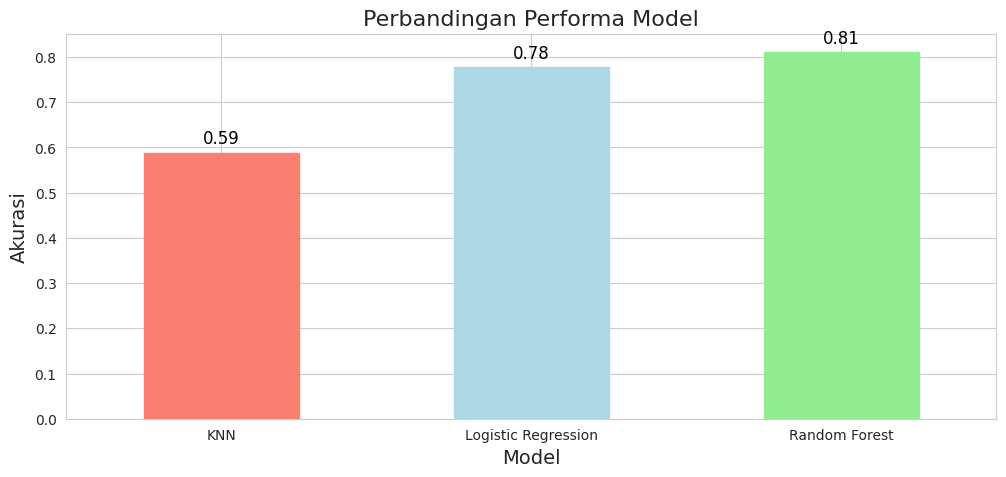

In [ ]:
def plot_model_comparison(model_scores):
    colors = ['salmon', 'lightblue', 'lightgreen']  # Daftar warna untuk setiap model

    ax = model_scores.T.plot(kind='bar', figsize=(12, 5))

    ax.set_title('Perbandingan Performa Model', fontsize=16)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('Akurasi' , fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.get_legend().remove()

    for i, _ in enumerate(ax.patches):
        height = _.get_height()
        ax.annotate(f'{height:.2f}', (_.get_x() + _.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')
        _.set_color(colors[i % len(colors)])  # Set warna pada setiap bar

    plt.show()

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
plot_model_comparison(model_compare)


## 5 - Evaluation
---

Evaluasi model dalam machine learning merupakan langkah penting untuk menilai sejauh mana model dapat memenuhi tujuan yang telah ditetapkan. Evaluasi dilakukan untuk memahami seberapa baik model dapat menggeneralisasi pola dari data yang tidak terlihat sebelumnya




### 5.1 - Confusion Matrix and Classification Report

#### 5.1.1 Confusion Matrix

Matriks kebingungan (confusion matrix) adalah alat evaluasi yang digunakan dalam machine learning untuk mengukur kinerja suatu model klasifikasi. Matriks ini menggambarkan performa model dengan membandingkan hasil prediksi model dengan kenyataan yang sebenarnya. Matriks kebingungan berisi empat elemen utama, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN).

![picture7](https://drive.google.com/uc?export=view&id=18wUDELhshhNF1GgBHVoXg-aKskHTNfZc)


* **True Positive (TP)**:

  * Jumlah observasi positif yang secara benar diprediksi oleh model sebagai positif.
  * Contohnya jika model memprediksi pasien menderita penyakit (positif), dan pasien tersebut memang benar-benar menderita penyakit, itu dihitung sebagai True Positive.

* **True Negative (TN)**:

  * Jumlah observasi negatif yang secara benar diprediksi oleh model sebagai negatif.
  * Contohnya jika model memprediksi pasien tidak menderita penyakit (negatif), dan pasien tersebut memang benar-benar tidak menderita penyakit, itu dihitung sebagai True Negative.

* **False Positive (FP)**:

  * Jumlah observasi negatif yang keliru diprediksi oleh model sebagai positif.
  * Contohnya jika model memprediksi pasien menderita penyakit (positif), tetapi kenyataannya pasien tersebut tidak menderita penyakit, itu dihitung sebagai False Positive.

* **False Negative (FN)**:

  * Jumlah observasi positif yang keliru diprediksi oleh model sebagai negatif.

  * Contohnya jika model memprediksi pasien tidak menderita penyakit (negatif), tetapi kenyataannya pasien tersebut menderita penyakit, itu dihitung sebagai False Negative.



In [ ]:
for name, model in models.items():
  print(f"{name}: ")
  print(confusion_matrix(y_test, model.predict(X_test)))

KNN: 
[[33 15]
 [22 20]]
Logistic Regression: 
[[37 11]
 [ 9 33]]
Random Forest: 
[[39  9]
 [ 8 34]]


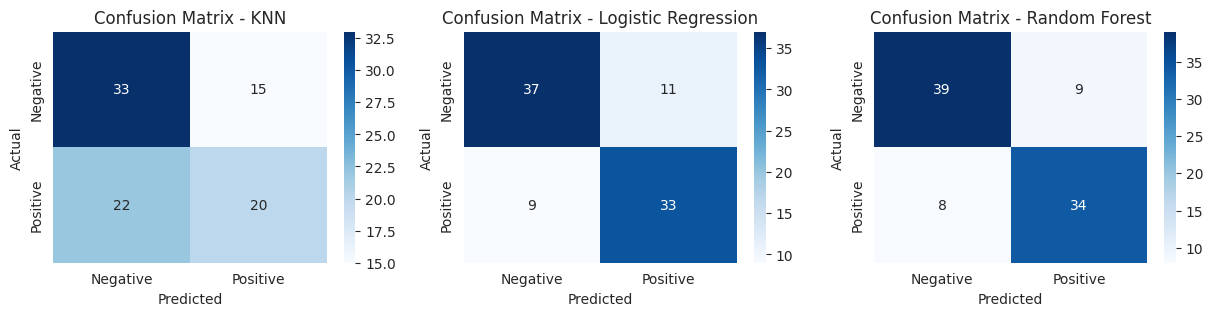

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 3))

# Iterasi melalui setiap model
for (name, model), ax in zip(models.items(), axes):
    cm = confusion_matrix(y_test, model.predict(X_test))

    # Menampilkan matriks kebingungan menggunakan heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)

    # Menyesuaikan label dan judul
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix - {name}")

# Menampilkan subplot
plt.show()


#### 5.1.2 - Classification Report


Classification Report adalah sebuah laporan atau ringkasan yang dapat dihasilkan menggunakan fungsi bawaan dalam library Scikit-Learn yang disebut `classification_report()`. Fungsi ini memberikan beberapa metrik utama untuk mengevaluasi performa suatu model klasifikasi. Metrik-metrik tersebut antara lain:

* **Precision**: Precision adalah rasio observasi positif yang diprediksi dengan benar terhadap total positif yang diprediksi. Ini mengukur akurasi prediksi positif.

> `Precision = TP / (TP + FP)`

* **Recall** (Sensitivitas atau Tingkat Positif Benar): Recall adalah rasio observasi positif yang diprediksi dengan benar terhadap seluruh observasi pada kelas yang sebenarnya. Ini mengukur kemampuan model untuk menangkap semua kasus positif yang mungkin.

> `Recall = TP / (TP + FN)`

* **F1-Score**: F1-Score adalah rata-rata tertimbang dari precision dan recall. Ini mempertimbangkan baik false positives maupun false negatives, dan memberikan keseimbangan antara precision dan recall.

> `F1-Score = 2 * ((Precision * Recall) / (Precision + Recall))`

* **Support**: Support adalah jumlah kejadian aktual dari kelas tertentu dalam dataset yang ditentukan. Ini membantu memahami berapa banyak instansi aktual yang ada untuk setiap kelas.

* **Akurasi**: Akurasi adalah rasio observasi yang diprediksi dengan benar terhadap total observasi. Ini mengukur kebenaran keseluruhan model.

> `Akurasi = TP + TN / Total Observations`






In [ ]:
for name, model in models.items():
    print(f"{name}: ")
    model.fit(X_train, y_train)
    print(classification_report(y_test, model.predict(X_test)))

KNN: 
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        48
           1       0.57      0.48      0.52        42

    accuracy                           0.59        90
   macro avg       0.59      0.58      0.58        90
weighted avg       0.59      0.59      0.58        90

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        48
           1       0.75      0.79      0.77        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90

Random Forest: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.82      0.79      0.80        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0

### 5.2 - Hyperparameter Optimization and Cross-Validation

Hyperparamter Optimization:
* **Hyperparameter optimization** adalah proses mencari kombinasi terbaik dari hyperparameter untuk suatu model machine learning dengan tujuan meningkatkan kinerja model tersebut. Hyperparameter adalah parameter yang tidak dapat dipelajari langsung dari data selama proses pelatihan model, dan mereka harus diatur sebelum pelatihan dimulai.

Cross-Validation:

* **Cross-validation** adalah suatu teknik evaluasi kinerja model machine learning yang membantu mengukur sejauh mana model dapat generalisasi pada data yang belum terlihat. Tujuan utama dari cross-validation adalah untuk memberikan perkiraan yang lebih andal tentang kinerja model daripada hanya menggunakan pembagian dataset menjadi satu set pelatihan dan satu set pengujian.

* Proses **cross-validation** melibatkan pembagian dataset ke dalam beberapa subset yang disebut lipatan atau "folds." Model kemudian dilatih pada beberapa kombinasi lipatan dan diuji pada lipatan yang tidak digunakan selama pelatihan. Ini memungkinkan model diuji pada data yang tidak pernah terlihat selama pelatihan, sehingga memberikan gambaran yang lebih baik tentang sejauh mana model dapat beradaptasi dengan data baru.

#### 5.2.1 - RandomizedSearchCV


**RandomizedSearchCV**, singkatan dari Randomized Search Cross-Validation, merupakan suatu metode dalam pustaka scikit-learn yang berfungsi untuk mencari kombinasi hyperparameter secara acak dalam suatu ruang hyperparameter yang telah ditentukan sebelumnya.

Dalam prosesnya, **RandomizedSearchCV** secara acak memilih kombinasi hyperparameter dari distribusi yang telah ditentukan untuk setiap parameter.
Proses ini memungkinkan model untuk dievaluasi pada berbagai kombinasi hyperparameter, memberikan peluang yang baik untuk menemukan kombinasi yang memberikan kinerja terbaik.

Setelah pencarian selesai, **RandomizedSearchCV** memberikan informasi tentang kombinasi hyperparameter terbaik dan skor evaluasi terbaik, yang dapat digunakan untuk mengoptimalkan model machine learning sebelum digunakan pada data yang belum terlihat.



##### 5.2.1.1 - Hyperparameter Grid

In [ ]:
# Create a hyperparameter grid for KNN
knn_grid = {"n_neighbors": np.arange(1, 50),
            "metric": ["minkowski", "manhattan", "euclidean"]
}
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-8, 8, 50),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100, 1000, 50),
           "max_depth": [None, 3, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60],
           "min_samples_split":[2, 5, 7, 9, 10],
           "min_samples_leaf": [1, 2, 5],
           "max_features": ['sqrt', 'log2'],
           "bootstrap": [True, False]}

 * **K-Nearest Neighbors (KNN):**
   - `n_neighbors`: Jumlah tetangga yang akan diperhitungkan oleh model untuk membuat prediksi. Semakin besar nilainya, semakin banyak tetangga yang diperhitungkan.
   - `metric`: Metrik jarak yang digunakan untuk mengukur jarak antara titik data. Beberapa metrik yang umum digunakan meliputi "minkowski", "manhattan", dan "euclidean".

* **Logistic Regression:**
   - `C`: Kebalikan kekuatan regularisasi. Nilai C yang lebih tinggi mengurangi kekuatan regularisasi, yang dapat mengakibatkan model lebih kompleks dan cenderung overfitting.
   - `solver`: Algoritma yang digunakan untuk mengoptimalkan fungsi objektif. Dalam konteks ini, "liblinear" digunakan, yang cocok untuk dataset kecil hingga menengah.

* **Random Forest Classifier:**
   - `n_estimators`: Jumlah pohon keputusan dalam ensemble. Semakin banyak pohon, semakin baik, tetapi meningkatkan kompleksitas model.
   - `max_depth`: Kedalaman maksimum setiap pohon dalam ensemble. Membatasi kedalaman dapat membantu mencegah overfitting.
   - `min_samples_split`: Jumlah sampel minimum yang diperlukan untuk membagi node internal. Nilai yang lebih tinggi dapat mencegah pembagian yang terlalu rumit.
   - `min_samples_leaf`: Jumlah sampel minimum yang diperlukan untuk menjadi leaf node. Nilai yang lebih tinggi dapat menghasilkan leaf node yang lebih bersih.
   - `max_features`: Jumlah fitur yang dipertimbangkan untuk pemilihan fitur pada setiap split. "sqrt" berarti akar kuadrat dari jumlah fitur, dan "log2" berarti logaritma basis 2 dari jumlah fitur.
   - `bootstrap`: Menentukan apakah sampel yang digunakan untuk melatih setiap pohon diambil secara acak dengan penggantian (True) atau tidak (False). Bootstraping dapat membantu meningkatkan variasi dalam model.

##### 5.2.1.2 - KNN

In [ ]:
np.random.seed(42)

rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rs_knn.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print("Best Hyperparameter: ",  rs_knn.best_params_)

Best Hyperparameter:  {'n_neighbors': 18, 'metric': 'manhattan'}


In [ ]:
print(f"Model Accuracy on Test Set: {rs_knn.score(X_test, y_test)*100:.2f}%")

Model Accuracy on Test Set: 65.56%


In [ ]:
print(classification_report(y_test, rs_knn.predict(X_test)))
print("Confusion Matrix : \n",confusion_matrix(y_test, rs_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        48
           1       0.65      0.57      0.61        42

    accuracy                           0.66        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.65      0.66      0.65        90

Confusion Matrix : 
 [[35 13]
 [18 24]]


##### 5.2.1.3 - Logistic Regression

In [ ]:
# Tune LogisticRegression
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print("Best Hyperparameter: ",  rs_log_reg.best_params_)

Best Hyperparameter:  {'solver': 'liblinear', 'C': 1.4563484775012443}


In [ ]:
print(f"Model Accuracy on Test Set: {rs_log_reg.score(X_test, y_test)*100:.2f}%")

Model Accuracy on Test Set: 80.00%


In [ ]:
print(classification_report(y_test, rs_log_reg.predict(X_test)))
print("Confusion Matrix : \n",confusion_matrix(y_test, rs_log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.76      0.83      0.80        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90

Confusion Matrix : 
 [[37 11]
 [ 7 35]]


##### 5.2.1.4 - Random Forest Classifier

In [ ]:
# Setup random seed
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           n_jobs = -1)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print("Best Hyperparameter: \n", rs_rf.best_params_)

Best Hyperparameter: 
 {'n_estimators': 800, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': True}


In [ ]:
print(f"Model Accuracy on Test Set: {rs_rf.score(X_test, y_test)*100:.2f}%")

Model Accuracy on Test Set: 80.00%


In [ ]:
print(classification_report(y_test, rs_rf.predict(X_test)))
print("Confusion Matrix : \n",confusion_matrix(y_test, rs_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.79      0.79      0.79        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90

Confusion Matrix : 
 [[39  9]
 [ 9 33]]


#### 5.2.2 - GridSearchCV

Berbeda dengan RandomizedSearchCV, **GridSearchCV** adalah suatu metode dalam pustaka scikit-learn yang mengadopsi pendekatan pencarian hyperparameter dengan mencoba secara sistematis semua kombinasi yang mungkin dalam suatu ruang hyperparameter yang telah ditentukan.

Dalam prosesnya, **GridSearchCV** secara eksplisit menguji setiap kombinasi hyperparameter, sehingga mencakup seluruh grid atau kisi parameter yang telah ditentukan sebelumnya.

Meskipun pendekatan ini dapat memastikan bahwa seluruh ruang hyperparameter telah dieksplorasi, pendekatan ini dapat memerlukan komputasi yang intensif, terutama jika ruang hyperparameternya besar.

Dengan mencoba semua kombinasi, **GridSearchCV** memberikan gambaran menyeluruh tentang kinerja model pada seluruh ruang hyperparameter, namun dapat memerlukan waktu yang lebih lama dibandingkan dengan pendekatan acak yang digunakan oleh RandomizedSearchCV.

Keputusan antara kedua metode ini tergantung pada trade-off antara kepastian dan efisiensi dalam proses pencarian hyperparameter.

##### 5.2.2.1 - Hyperparameter Grid

In [ ]:
# Create a hyperparameter grid for KNN
knn_grid2 = {"n_neighbors": np.arange(1, 50),
            "metric": ["minkowski", "manhattan", "euclidean"]
}

# Create a hyperparameter grid for LogisticRegression
log_reg_grid2 = {"C": np.logspace(-8, 8, 50),
                 "solver": [ "liblinear" ]
                  }
# Create a hyperparameter grid for RandomForestClassifier
rf_grid2 = {"n_estimators": np.arange(100, 1000, 50),
           "max_depth": [None, 3, 5, 10, 60],
           "min_samples_split": [2],
           "min_samples_leaf": [1],
            "max_features": [0.5 ,'sqrt', 'log2'],
            "bootstrap": [True, False]}

##### 5.2.2.2 - KNN

In [ ]:
np.random.seed(42)
# Setup grid hyperparameter search for LogisticRegression
gs_knn = GridSearchCV(KNeighborsClassifier(),
                          param_grid=knn_grid2,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_knn.fit(X_train, y_train);

Fitting 5 folds for each of 147 candidates, totalling 735 fits


In [ ]:
print("Best Hyperparameter: ", gs_knn.best_params_)

Best Hyperparameter:  {'metric': 'manhattan', 'n_neighbors': 18}


In [ ]:
print(f"Model Accuracy on Test Set: {gs_knn.score(X_test, y_test)*100:.2f}%")

Model Accuracy on Test Set: 65.56%


##### 5.2.2.3 - Logistic Regression

In [ ]:
np.random.seed(42)
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid2,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
print("Best Hyperparameter: ", gs_log_reg.best_params_ )

Best Hyperparameter:  {'C': 0.07196856730011514, 'solver': 'liblinear'}


In [ ]:
print(f"Model Accuracy on Test Set: {gs_log_reg.score(X_test, y_test)*100:.2f}%")

Model Accuracy on Test Set: 77.78%


##### 5.2.2.4 - Random Forest Classifier

In [ ]:
np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                              param_grid = rf_grid2,
                              cv=5,
                              verbose=True,
                              n_jobs = -1)

gs_rf.fit(X_train, y_train);


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [ ]:
print("Best Hyperparameter: \n", gs_rf.best_params_)

Best Hyperparameter: 
 {'bootstrap': True, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
print(f"Model Accuracy on Test Set: {gs_rf.score(X_test, y_test)*100:.2f}%")

Model Accuracy on Test Set: 78.89%


### 5.3 - Finding the Best Model after Hyperparameter Tuning

In [ ]:
np.random.seed(42)
knn_tuned = KNeighborsClassifier(n_neighbors = 18, metric = 'manhattan')
log_reg_tuned =  LogisticRegression (solver = 'liblinear', C = 1.4563484775012443)
rf_tuned = RandomForestClassifier(n_estimators= 600, min_samples_split= 2, min_samples_leaf= 1,
                                  max_features='log2' , max_depth = 15, bootstrap = True )

new_models = {"KNN" : knn_tuned,
              "Logistic Regression" : log_reg_tuned,
              "Random Forest" : rf_tuned}

#### 5.3.1 - Single Test Set

Pada tahap ini, model dievaluasi berdasarkan satu set data pengujian yang belum pernah dilihat sebelumnya.

Hasil analisis ini menunjukkan bagaimana model dapat menggeneralisasi informasi ke data baru yang bukan bagian dari proses pelatihan.

##### 5.3.1.1 - Model Scores

In [ ]:
np.random.seed(42)
def fit_and_score2(models, X_train, X_test, y_train, y_test):
  model_scores = {}

  for name, model in new_models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
new_model_scores = fit_and_score2(models = new_models,
                             X_train= X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

for model, score in new_model_scores.items():
    print(f"{model}: Akurasi sebesar {score*100:.2f}%")

KNN: Akurasi sebesar 65.56%
Logistic Regression: Akurasi sebesar 80.00%
Random Forest: Akurasi sebesar 82.22%


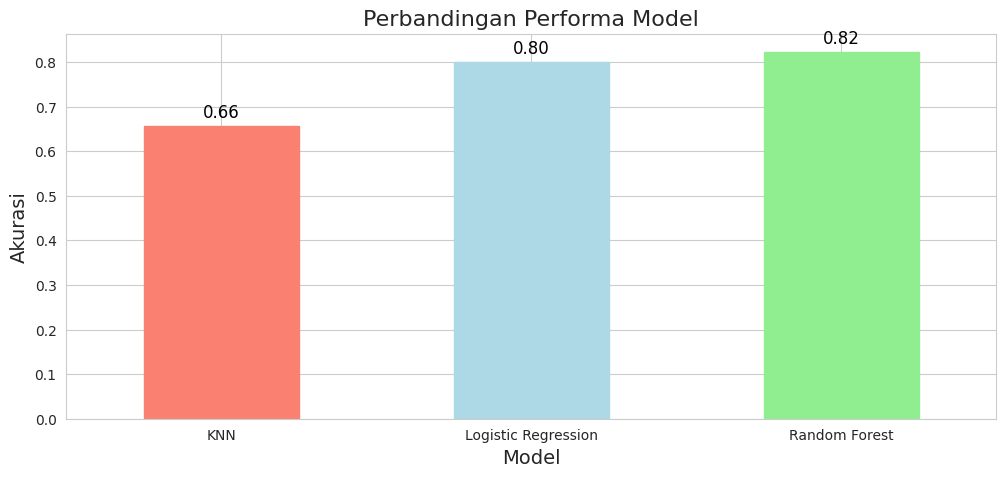

In [ ]:
def plot_model_comparison(new_model_scores):
    colors = ['salmon', 'lightblue', 'lightgreen']

    ax = new_model_scores.T.plot(kind='bar', figsize=(12, 5))

    ax.set_title('Perbandingan Performa Model', fontsize=16)
    ax.set_xlabel('Model', fontsize=14)
    ax.set_ylabel('Akurasi' , fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.get_legend().remove()

    for i, _ in enumerate(ax.patches):
        height = _.get_height()
        ax.annotate(f'{height:.2f}', (_.get_x() + _.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')
        _.set_color(colors[i % len(colors)])

    plt.show()

model_compare = pd.DataFrame(new_model_scores, index=['accuracy'])
plot_model_comparison(model_compare)

##### 5.3.1.2 - Confusion Matrix

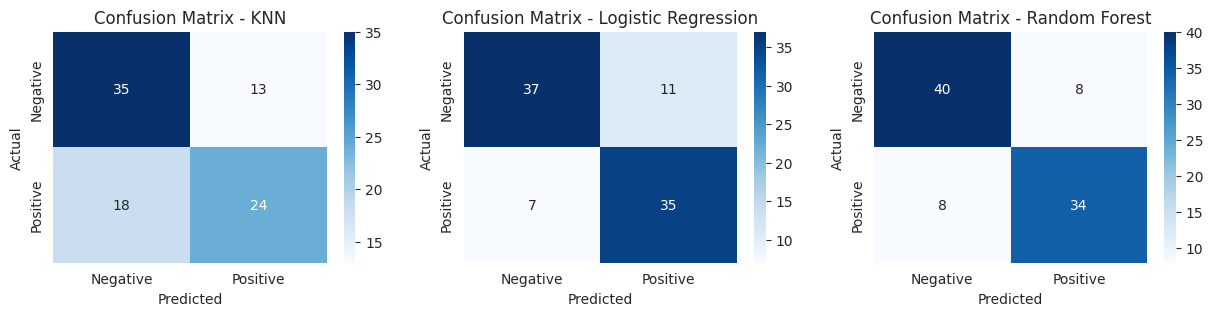

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(new_models), figsize=(15, 3))

# Iterasi melalui setiap model
for (name, model), ax in zip(new_models.items(), axes):
    cm = confusion_matrix(y_test, model.predict(X_test))

    # Menampilkan matriks kebingungan menggunakan heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)

    # Menyesuaikan label dan judul
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix - {name}")

# Menampilkan subplot
plt.show()

##### 5.3.1.3 - Classification Report

In [ ]:
for name, model in new_models.items():
    print(f"{name}: ")
    model.fit(X_train, y_train)
    print(classification_report(y_test, model.predict(X_test)))

KNN: 
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        48
           1       0.65      0.57      0.61        42

    accuracy                           0.66        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.65      0.66      0.65        90

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.76      0.83      0.80        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90

Random Forest: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.80      0.83      0.81        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0

#### 5.3.2 - Cross-Validation Assessment
Dalam langkah ini, performa model dinilai dengan menggunakan metode cross-validation, di mana dataset dibagi menjadi beberapa lipatan (folds). Model diuji secara iteratif pada setiap lipatan, sementara lipatan lainnya digunakan untuk pelatihan.

Perbandingan hasil kinerja dari setiap iterasi memberikan gambaran yang dapat diandalkan tentang seberapa baik model dapat beradaptasi dengan variasi dalam data dan menghindari overfitting atau underfitting.

![picture8](https://drive.google.com/uc?export=view&id=1Vp0T1F6T2RelBVpXmA51BeorkJf550T3)

K-fold cross-validation (k=5) adalah metode evaluasi model machine learning yang membagi dataset menjadi k subset, kemudian secara iteratif melatih model pada k-1 subset dan mengujinya pada subset yang tidak dilatih. Proses ini diulang sebanyak k kali untuk memberikan estimasi akurasi rata-rata yang lebih stabil.







##### 5.3.2.1 - Accuracy

In [ ]:
np.random.seed(42)

accuracy_table_data = []

for name, model in new_models.items():
    # Lakukan cross-validation untuk mendapatkan akurasi
    cv_accuracy = cross_val_score(model, X, y, cv=5, scoring="accuracy")

    # Hitung dan cetak rata-rata akurasi untuk setiap model
    mean_accuracy = np.mean(cv_accuracy)

    # Tambahkan data ke tabel
    accuracy_table_data.append([name, *cv_accuracy, mean_accuracy])

# Header tabel
table_header = ["Model", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean accuracy"]

# Cetak tabel menggunakan tabulate
print(tabulate(accuracy_table_data, headers=table_header, tablefmt="fancy_grid"))

╒═════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═════════════════╕
│ Model               │   Fold 1 │   Fold 2 │   Fold 3 │   Fold 4 │   Fold 5 │   Mean accuracy │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═════════════════╡
│ KNN                 │ 0.633333 │ 0.733333 │ 0.728814 │ 0.779661 │ 0.576271 │        0.690282 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────────┤
│ Logistic Regression │ 0.616667 │ 0.883333 │ 0.813559 │ 0.932203 │ 0.830508 │        0.815254 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────────┤
│ Random Forest       │ 0.566667 │ 0.833333 │ 0.79661  │ 0.915254 │ 0.559322 │        0.734237 │
╘═════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╧═════════════════╛


##### 5.3.2.2 - Precision

In [ ]:
np.random.seed(42)

precision_table_data = []

for name, model in new_models.items():
    # Lakukan cross-validation untuk mendapatkan akurasi
    cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")

    # Hitung dan cetak rata-rata akurasi untuk setiap model
    mean_precision = np.mean(cv_precision)

    # Tambahkan data ke tabel
    precision_table_data.append([name, *cv_precision, mean_precision])

# Header tabel
table_header = ["Model", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean precision"]

# Cetak tabel menggunakan tabulate
print(tabulate(precision_table_data, headers=table_header, tablefmt="fancy_grid"))

╒═════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════════════╕
│ Model               │   Fold 1 │   Fold 2 │   Fold 3 │   Fold 4 │   Fold 5 │   Mean precision │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════════════╡
│ KNN                 │ 0.666667 │ 0.833333 │ 0.72     │ 0.791667 │ 0.5625   │         0.714833 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────────────┤
│ Logistic Regression │ 1        │ 0.92     │ 0.766667 │ 0.870968 │ 0.793103 │         0.870148 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────────────┤
│ Random Forest       │ 0.75     │ 0.909091 │ 0.741935 │ 0.84375  │ 0.510204 │         0.750996 │
╘═════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╧══════════════════╛


##### 5.3.2.3 - Recall

In [ ]:
np.random.seed(42)

recall_table_data = []

for name, model in new_models.items():
    # Lakukan cross-validation untuk mendapatkan akurasi
    cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")

    # Hitung dan cetak rata-rata akurasi untuk setiap model
    mean_recall = np.mean(cv_recall)

    # Tambahkan data ke tabel
    recall_table_data.append([name, *cv_recall, mean_recall])

# Header tabel
table_header = ["Model", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean recall"]

# Cetak tabel menggunakan tabulate
print(tabulate(recall_table_data, headers=table_header, tablefmt="fancy_grid"))

╒═════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════════╕
│ Model               │   Fold 1 │   Fold 2 │   Fold 3 │   Fold 4 │   Fold 5 │   Mean recall │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═══════════════╡
│ KNN                 │ 0.428571 │ 0.535714 │ 0.666667 │ 0.703704 │ 0.333333 │      0.533598 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼───────────────┤
│ Logistic Regression │ 0.178571 │ 0.821429 │ 0.851852 │ 1        │ 0.851852 │      0.740741 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼───────────────┤
│ Random Forest       │ 0.107143 │ 0.714286 │ 0.851852 │ 1        │ 0.925926 │      0.719841 │
╘═════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╧═══════════════╛


##### 5.3.2.4 - F1-score

In [ ]:
np.random.seed(42)

f1_table_data = []

for name, model in new_models.items():
    # Lakukan cross-validation untuk mendapatkan akurasi
    cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")

    # Hitung dan cetak rata-rata akurasi untuk setiap model
    mean_f1 = np.mean(cv_f1)

    # Tambahkan data ke tabel
    f1_table_data.append([name, *cv_f1, mean_f1])

# Header tabel
table_header = ["Model", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean f1-score"]

# Cetak tabel menggunakan tabulate
print(tabulate(f1_table_data, headers=table_header, tablefmt="fancy_grid"))

╒═════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═════════════════╕
│ Model               │   Fold 1 │   Fold 2 │   Fold 3 │   Fold 4 │   Fold 5 │   Mean f1-score │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╪═════════════════╡
│ KNN                 │ 0.521739 │ 0.652174 │ 0.692308 │ 0.745098 │ 0.418605 │        0.605985 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────────┤
│ Logistic Regression │ 0.30303  │ 0.867925 │ 0.807018 │ 0.931034 │ 0.821429 │        0.746087 │
├─────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────────┤
│ Random Forest       │ 0.1875   │ 0.8      │ 0.793103 │ 0.915254 │ 0.657895 │        0.67075  │
╘═════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╧═════════════════╛


##### 5.3.2.5 - Comparison of Model Metrics

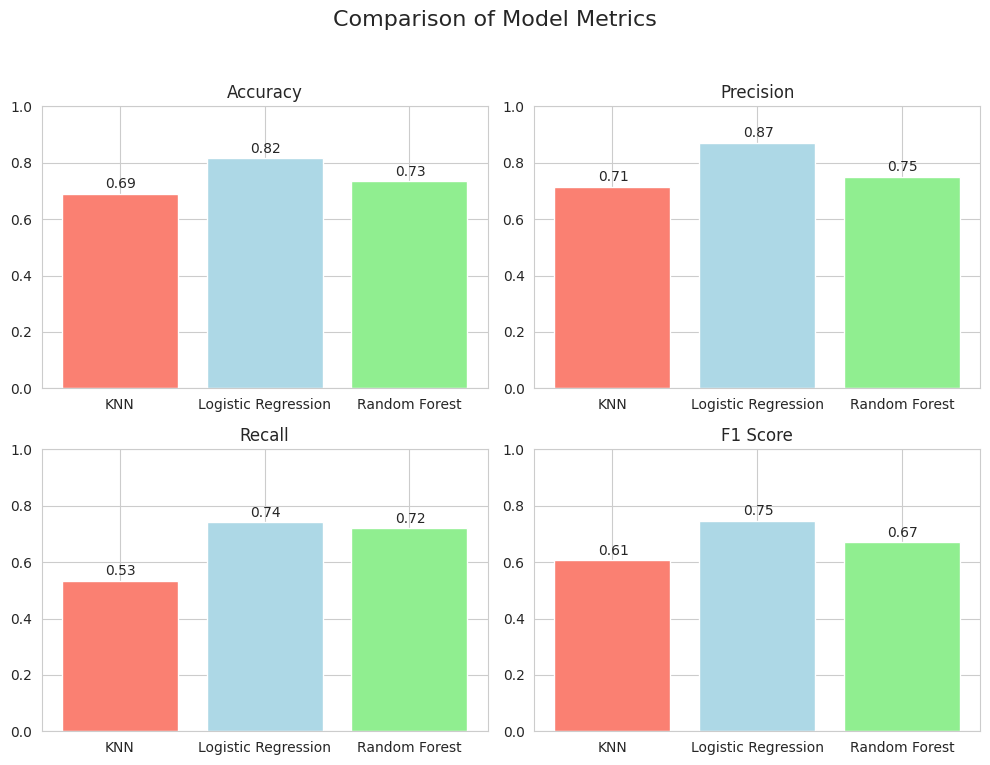

In [ ]:
mdls = ["KNN", "Logistic Regression", "Random Forest"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

cv_metrics = {}
j = 6

for i, model in enumerate(mdls):
    cv_metrics[model] = [accuracy_table_data[i][j],
                         precision_table_data[i][j],
                         recall_table_data[i][j],
                         f1_table_data[i][j]]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Comparison of Model Metrics', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    # Menampilkan bar plot untuk setiap model
    bars = axes[row, col].bar(mdls, [cv_metrics[model][i] for model in mdls],
                              color=['salmon', 'lightblue', 'lightgreen'])
    axes[row, col].set_title(metric)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].set_title(metric)
    axes[row, col].set_ylim([0, 1])

    for j, (bar, value) in enumerate(zip(bars, cv_metrics.values())):
      axes[row, col].text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02,
                          f'{value[i]:.2f}', fontsize=10)

# Menyusun subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 5.4 - Optimal Model Selection

Dalam evaluasi menggunakan **single Test Set**, model Random Forest mencapai skor tertinggi, menunjukkan keefektifannya pada situasi pengujian individual. Meskipun demikian, ketika melibatkan pengujian **cross-validation**, model Logistic Regression menunjukkan keunggulan yang konsisten dengan skor yang lebih baik secara keseluruhan. Variabilitas kinerja antara kedua model dapat dijelaskan oleh fakta bahwa Random Forest mungkin lebih cocok untuk keadaan pengujian tertentu, sementara Logistic Regression menonjol dalam konsistensi dan unggulan pada berbagai kondisi dalam **cross-validation**.


Dalam konteks dataset yang terbatas seperti pada proyek ini yang hanya terdiri dari 297 dataset, penggunaan **cross-validation** mungkin lebih optimal. Dengan jumlah data yang terbatas, **cross-validation** memberikan keunggulan dalam memberikan estimasi yang lebih stabil terkait kinerja model, jika dibandingkan dengan keterbatasan yang mungkin muncul ketika hanya menggunakan **single test set**. Dengan cara ini, **cross-validation** memberikan gambaran yang lebih lengkap dan dapat diandalkan tentang kemampuan model dalam menanggapi variasi data yang terbatas.

Dengan hasil ini, kesimpulan proyek ini menegaskan bahwa model **Logistic Regression** adalah pilihan yang optimal untuk prediksi penyakit jantung.  Model ini menunjukkan konsistensi dan keunggulan kinerja yang konsisten dalam berbagai kondisi pengujian.




### 5.5 - Feature Importance

Dikarenakan model **Logistic Regression** terbukti menjadi pilihan yang optimal, langkah berikutnya adalah mengeksplorasi feature importance pada model terbaik ini. Proses ini bertujuan untuk mengidentifikasi dan menilai kontribusi relatif dari setiap fitur dalam pengambilan keputusan oleh model **Logistic Regression**.

Dengan memahami feature importance, kita dapat mendapatkan pemahaman yang lebih baik tentang faktor-faktor krusial yang memengaruhi prediksi model, memperkuat interpretasi hasil dan membimbing pengambilan keputusan yang lebih informatif.

> 1. **age**: usia
2. **sex**: jenis kelamin
3. **cp**: chest pain type / jenis nyeri dada
4. **trestbps(resting blood preasure)**: tekanan darah
5. **chol (cholesterol)**: kolesterol serum dalam mg/dl
6. **fbs** (fasting blood sugar):gula darah puasa > 120 mg/dl
7. **restecg(Hasil elektrokardiografi)**: resting electrocardiographic results
8. **thalach**: denyut jantung maksimum yang dicapai
9. **exang (exercise induced angina)**: angina yang diinduksi oleh olahraga
10. **oldpeak** : depresi ST yang disebabkan oleh olahrga relatif terhadap istirahat
11. **slope**: Kemiringian segmen ST latihan puncak
12. **ca(calculate artery)**: jumlah pembuluh darah utama yang diwarnai dengan flourosopi
13. **thal**: Jenis kelainan thalassemia
14. **condition**: kondisi kesehatan jantung



In [ ]:
optimal_model = log_reg_tuned
optimal_model.fit(X_train, y_train)


features_dict = dict(zip(df.columns, list(optimal_model.coef_[0])))


print("Feature Importance:")
for feature, importance in features_dict.items():
    print(f"{feature}: {importance:.4f}")

Feature Importance:
age: -0.0375
sex: 1.4140
cp: 0.2302
trestbps: 0.0249
chol: 0.0071
fbs: -0.8753
restecg: 0.2664
thalach: -0.0421
exang: 0.4111
oldpeak: 0.4741
slope: 0.3257
ca: 1.2672
thal: 0.8152


In [ ]:
# Visualize feature importance with Plotly
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df = feature_df.T.reset_index()
feature_df.columns = ['Feature', 'Importance']

fig = px.bar(feature_df, x='Feature', y='Importance', title="Feature Importance")
fig.update_layout(xaxis_title="Feature", yaxis_title="Importance", showlegend=False)
fig.show()

* Nilai Positif (> 0):

  * Fitur dengan nilai importance positif menunjukkan bahwa peningkatan nilai fitur tersebut akan meningkatkan prediksi yang mendukung kelas atau nilai target yang lebih tinggi.
  * Semakin tinggi nilai importance, semakin besar kontribusi fitur terhadap prediksi positif.

* Nilai Negatif (< 0):

  * Fitur dengan nilai importance negatif menunjukkan bahwa peningkatan nilai fitur tersebut akan menurunkan prediksi yang mendukung kelas atau nilai target yang lebih tinggi.
  * Semakin rendah nilai importance, semakin besar kontribusi fitur terhadap prediksi negatif.

* Nilai Dekat Nol (0):

  * Fitur dengan nilai importance yang mendekati nol tidak memiliki pengaruh besar terhadap prediksi. Peningkatan atau penurunan nilai fitur ini hanya sedikit memengaruhi hasil prediksi.

## 6 - Experimentation
---
Dengan penelitian ini, kita telah menjelajahi berbagai model machine learning untuk memprediksi penyakit jantung. Hasil evaluasi dan tuning hyperparameter menunjukkan bahwa model **Logistic Regression** muncul sebagai pilihan optimal, menampilkan kinerja yang konsisten.

Analisis feature importance juga memberikan wawasan mendalam tentang variabel yang paling berpengaruh dalam prediksi penyakit jantung.

Jika pencapaian metrik evaluasi pada model saat ini belum memenuhi target yang diinginkan, pertimbangkan beberapa strategi untuk meningkatkannya:

* **Perolehan Data Tambahan dan Peningkatan Kualitas**:
Pertimbangkan untuk mengumpulkan lebih banyak data jika memungkinkan dan memastikan kualitas data yang tinggi. Dataset yang lebih besar dan lebih representatif dapat membantu model mempelajari pola dengan lebih baik.

* **Pertimbangkan Model yang lebih baik**:
Evaluasi model-model unggul seperti CatBoost atau XGBoost. Model ini sering kali memiliki kemampuan pembelajaran yang lebih kuat dan dapat memberikan kinerja yang lebih baik, terutama dalam konteks dataset yang kompleks.

* **Optimalkan Model Saat Ini**:
Tinjau kembali model-model yang telah dibuat dan pertimbangkan untuk mengoptimalkan hyperparameter atau menggunakan teknik lainnya untuk meningkatkan kinerjanya. Mungkin ada ruang untuk peningkatan dengan penyesuaian yang lebih baik terhadap karakteristik khusus dataset.

* **Explorasi Teknik Pemrosesan Data**:
Periksa apakah terdapat potensi peningkatan melalui pemrosesan data tambahan, seperti pemilihan fitur yang lebih baik, normalisasi data, atau penanganan outlier. Terkadang, pengolahan data yang cermat dapat meningkatkan kualitas input untuk model.

* **Pemilihan Metode Evaluasi yang Lebih Sesuai**:
Mungkin perlu mempertimbangkan metode evaluasi yang lebih sesuai dengan sifat spesifik dari masalah yang dihadapi. Beberapa metrik evaluasi dapat memberikan wawasan yang lebih baik terhadap kualitas model tergantung pada karakteristik dataset.


Jika model telah berhasil mencapai kinerja yang memuaskan dan siap untuk didistribusikan, langkah selanjutnya adalah melakukan ekspor model. Proses ini melibatkan penyimpanan parameter dan struktur model ke dalam format yang dapat diakses dan digunakan oleh orang lain, seperti file pickle atau format model yang diterima oleh framework tertentu. Dengan cara ini, model dapat dengan mudah dibagikan dan digunakan oleh pihak lain untuk keperluan praktis atau penelitian lebih lanjut.


Keseluruhan, proyek ini memberikan kontribusi pada pemahaman kita tentang penerapan machine learning dalam konteks kesehatan kardiovaskular. Dengan penekanan pada interpretabilitas dan konsistensi kinerja, model yang dikembangkan dapat menjadi alat yang bermanfaat dalam mendukung diagnosis dan pengambilan keputusan klinis terkait penyakit jantung.


![picture9](https://drive.google.com/uc?export=view&id=17gqRykmTTz9adsvGLdRCAF2zPC7GQYZY)

